In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython import display
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the dataset
dataset = pd.read_csv("/Users/sumedha/Desktop/iris.csv")
#Dropping labels
X = dataset.iloc[:, 0:-1].values
#Storing labels in y
y = dataset.iloc[:, -1].values

In [3]:
# defining function do_pca
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [28]:
# defining function pca results
def pca_results(full_dataset, pca):
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    fig, ax = plt.subplots(figsize = (14,8))
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    return pd.concat([variance_ratios, components], axis = 1)

In [29]:
# Assuming we apply PCA such that 
#we want to reduce number of dimensions to 3
pca, X_pca = do_pca(3, dataset)

,Explained Variance,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Dimension 1,0.7659,0.4456,-0.2286,0.5066,0.4974,0.4952
Dimension 2,0.1843,0.3780,0.9227,0.0264,0.0701,-0.0117
Dimension 3,0.0373,-0.7521,0.2853,-0.0291,0.3866,0.4501


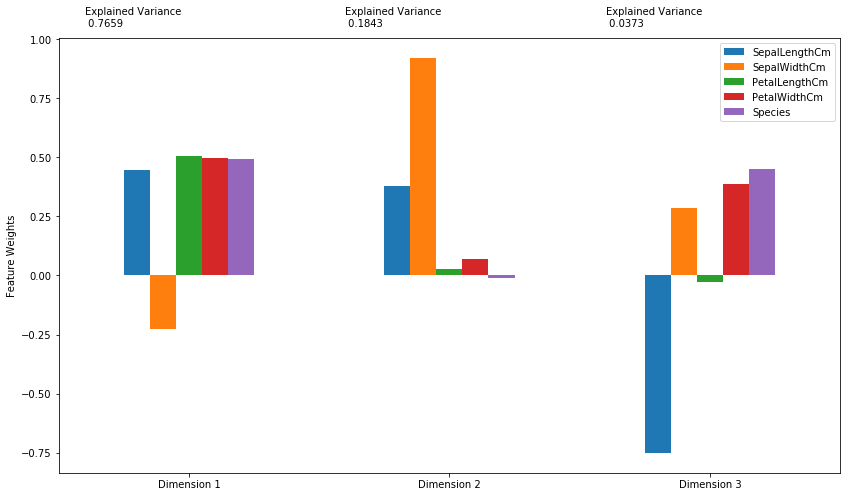

In [30]:
#Shows variance when number of dimensions = 1,2,3 respectively
pca_results(dataset, pca)

Using 2 components, we can explain 0.9502% of the variability in the original data.


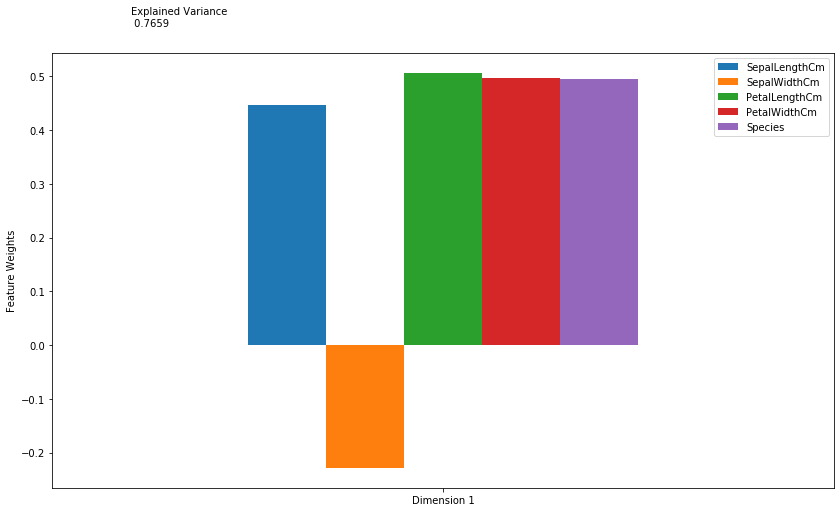

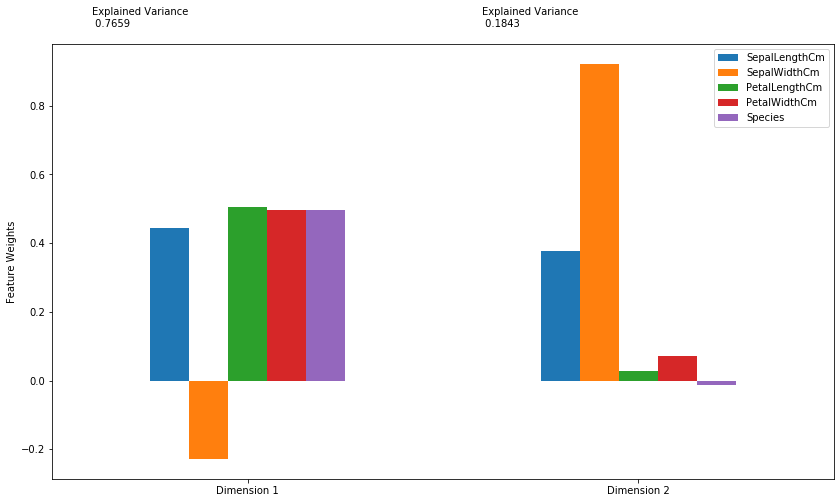

In [31]:
#Finding number of components such that variance > 85%
for comp in range(1, dataset.shape[1]):
    pca, X_pca = do_pca(comp, dataset)
    comp_check = pca_results(dataset, pca)
    if comp_check['Explained Variance'].sum() > 0.85:
        break
        

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(comp_check.shape[0],comp_check['Explained Variance'].sum()))